# Evaluating the model prediction performance

__Objective__: Evaluating the model prediction performance with malicious inputs

__Workflow__:
1. Load the `x_test_adv_pgd, y_adv_pred_pgd, x_test_adv_bim, y_adv_pred_bim, x_test_adv_cw, y_adv_pred_cw` numpy matrices that are created in the previous milestone. Use Numpy's `np.load` method to load the compressed file.
2. For benign inputs
   1. Plot confusion matrix for the benign inputs (e.g. create the confusion matrix from `testY` and `predictions` arrays)
      - Methods are `confusion_matrix` and `ConfusionMatrixDisplay`
   2. Plot count distributions of each classes for `testY` and `predictions` 
      - Use `sns.countplot` method with Panda's `dataframe`
3. For PGD based malicious inputs
   1. Plot confusion matrix for the benign inputs (e.g. create the confusion matrix from `testY` and `y_adv_pred_fgsm` arrays).
      - Methods are `confusion_matrix` and `ConfusionMatrixDisplay`.
      - Note that only top 100 instances are used.
   2. Plot count distributions of each classes for `testY` and `y_adv_pred_pgd` 
      - Use `sns.countplot` method with Panda's `dataframe`
   3. Plot distortions count plot
      - Find the difference (e.g. distance matrix) between `testX` and `x_test_adv_pgd`
      - Use Tensorflow's `tf.norm` method to calcluate the norm value vector of the distance matrix. `ord` parameter is `np.inf`
      - Plot `sns.countplot` of norm value vector. The plot should contain only one value in the x-axis which is around 0.08 (like ATTACK_POWER).
4. For BIM based malicious inputs
   1. Plot confusion matrix for the benign inputs (e.g. create the confusion matrix from `testY` and `y_adv_pred_bim` arrays)
      - Methods are `confusion_matrix` and `ConfusionMatrixDisplay`
      - Note that only top 100 instances are used.
   2. Plot count distributions of each classes for `testY` and `y_adv_pred_bim` 
      - Use `sns.countplot` method with Panda's `dataframe`
   3. Plot distortions count plot
      - Find the difference (e.g. distance matrix) between `testX` and `x_test_adv_bim`
      - Use Tensorflow's `tf.norm` method to calcluate the norm value vector of the distance matrix. `ord` parameter is `np.inf`
      - Plot `sns.countplot` of norm value vector. The plot should contain only one value in the x-axis which is around 0.03 (like ATTACK_POWER).
5. For C&W based malicious inputs
   1. Plot confusion matrix for the benign inputs (e.g. create the confusion matrix from `testY` and `y_adv_pred_bim` arrays)
      - Methods are `confusion_matrix` and `ConfusionMatrixDisplay`
      - Note that only top **8** instances are used.
   2. Plot count distributions of each classes for `testY` and `y_adv_pred_cw` 
      - Use `sns.countplot` method with Panda's `dataframe`
   3. Plot distortions count plot
      - Find the difference (e.g. distance matrix) between `testX` and `x_test_adv_cw`
      - Use Tensorflow's `tf.norm` method to calcluate the norm value vector of the distance matrix. `ord` parameter is `np.inf`
      - Plot `sns.countplot` of norm value vector. C&W attack's generated malicious inputs have different norm values. Also, all values are much smaller than 0.08 (e.g. ATTACK_POWER). It means that this attack can generate malicious inputs with relatively small perturbations.


__Deliverable__:

The deliverable is a Jupyter Notebook documenting your workflow.

In [1]:
import numpy as np
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import tensorflow as tf
sns.set()
SAMPLE_SIZE=100
SAMPLE_SIZE_CW=8

In [2]:
# Step 1: Load the numpy matrices 
data = np.load('milestone-3-1.npz')

trainX = data['trainX']
testX = data['testX']
trainY = data['trainY']
testY = data['testY']
predictions = data['predictions']
x_test_adv_pgd = data['x_test_adv_pgd']
y_adv_pred_pgd = data['y_adv_pred_pgd']
x_test_adv_bim = data['x_test_adv_bim']
y_adv_pred_bim = data['y_adv_pred_bim']
x_test_adv_cw = data['x_test_adv_cw']
y_adv_pred_cw = data['y_adv_pred_cw']

## Step 2: Model prediction performance evaluation with benign inputs

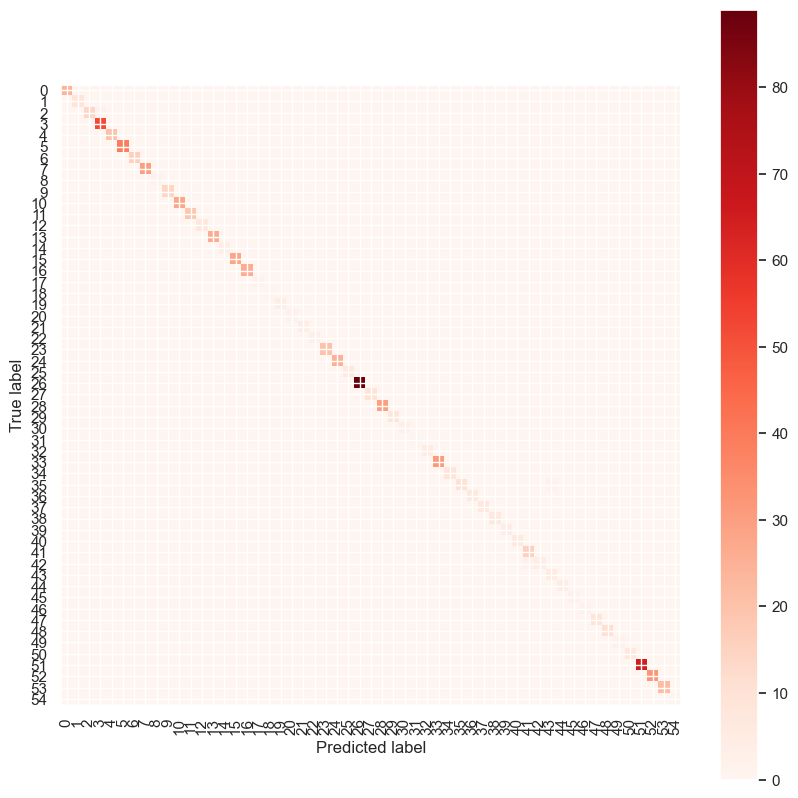

In [3]:
# Step 2.A 
cm = confusion_matrix(testY.argmax(axis=1), predictions.argmax(axis=1))
fig, ax = plt.subplots(figsize=(10,10))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(ax=ax,cmap = 'Reds',include_values=False,xticks_rotation='vertical')

plt.show()

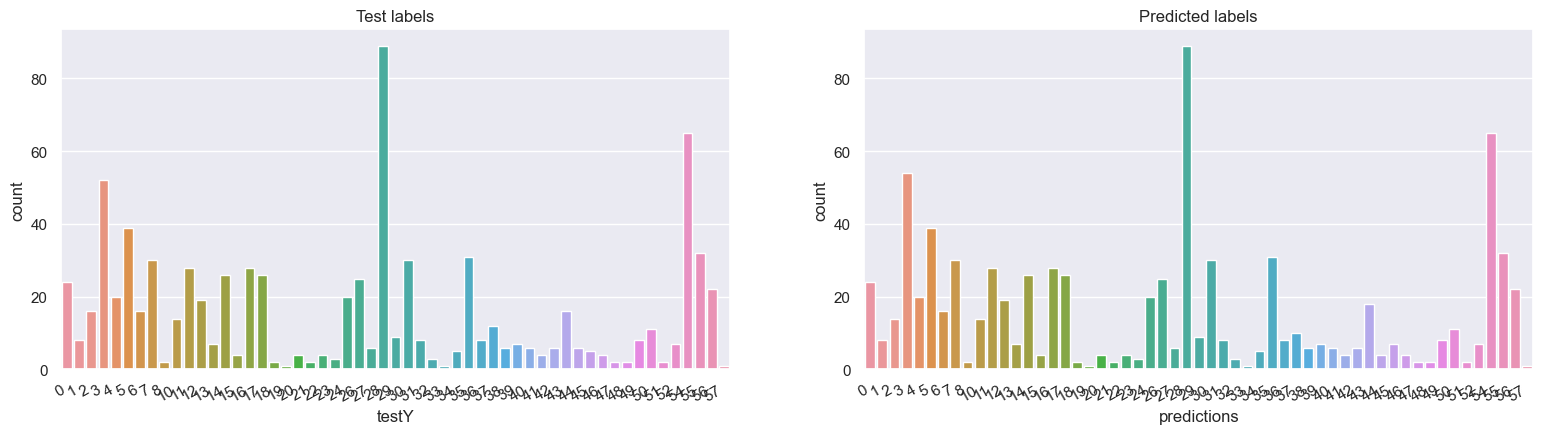

In [4]:
# Step 2.B 
df = pd.DataFrame({'testY':testY.argmax(axis=1),'predictions':predictions.argmax(axis=1)})
fig, ax = plt.subplots(1,2,figsize=(19,5))
sns.countplot(x='testY',data=df,ax=ax[0])
ax[0].set_title('Test labels')

sns.countplot(x='predictions',data=df,ax=ax[1])
ax[1].set_title('Predicted labels')

fig.autofmt_xdate()
plt.show()

## Step 3: Model prediction performance evaluation with PGD based malicious inputs

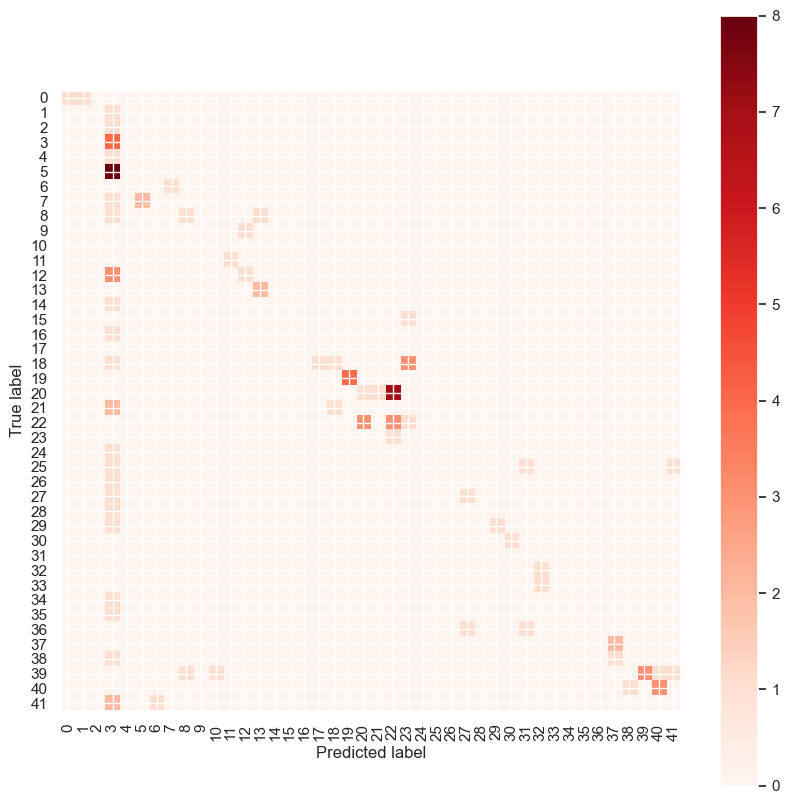

In [5]:
# Step 3.A 
cm = confusion_matrix(testY[0:SAMPLE_SIZE].argmax(axis=1), y_adv_pred_pgd.argmax(axis=1))
fig, ax = plt.subplots(figsize=(10,10))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(ax=ax,cmap = 'Reds',include_values=False,xticks_rotation='vertical')
plt.show()

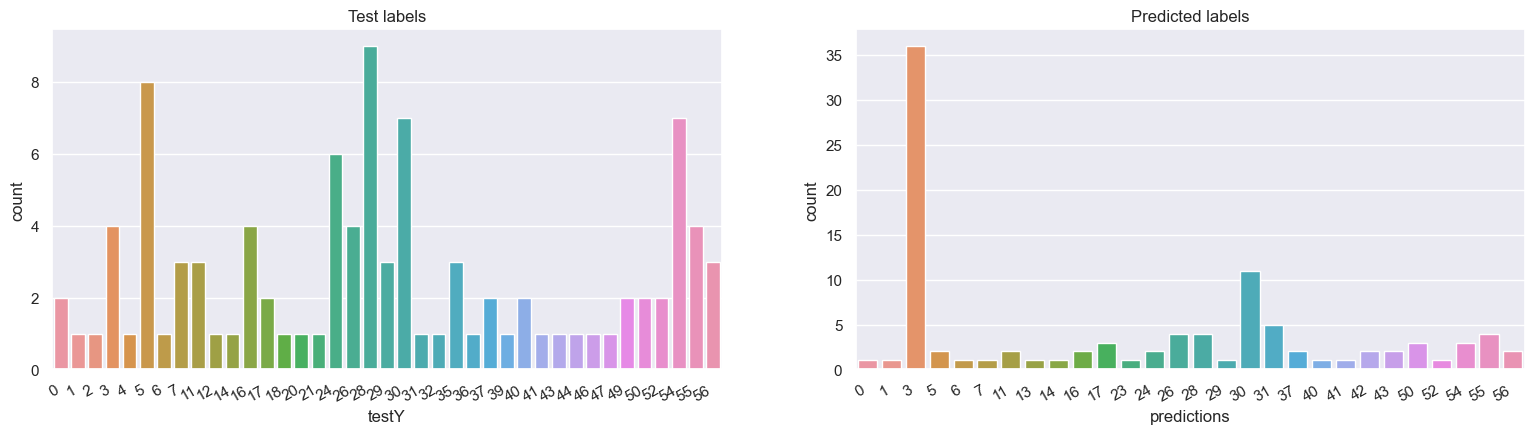

In [6]:
# Step 3.B 
df = pd.DataFrame({'testY':testY[0:SAMPLE_SIZE].argmax(axis=1),'predictions':y_adv_pred_pgd.argmax(axis=1)})
fig, ax = plt.subplots(1,2,figsize=(19,5))
sns.countplot(x='testY',data=df,ax=ax[0])
ax[0].set_title('Test labels')

sns.countplot(x='predictions',data=df,ax=ax[1])
ax[1].set_title('Predicted labels')

fig.autofmt_xdate()
plt.show()

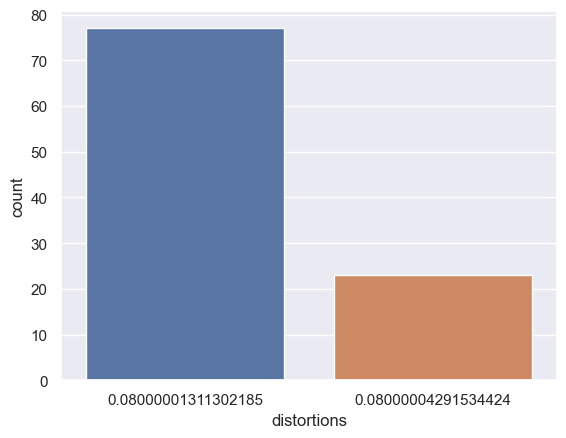

In [7]:
# Step 3.C 
distortion_array = testX[0:SAMPLE_SIZE] - x_test_adv_pgd
distortions = [tf.norm(distortion_array[i,:],ord=np.inf).numpy() for i in range(distortion_array.shape[0])]
df = pd.DataFrame({'distortions':distortions})
sns.countplot(x='distortions',data=df)
plt.show()

## Step 4: Model prediction performance evaluation with BIM based malicious inputs

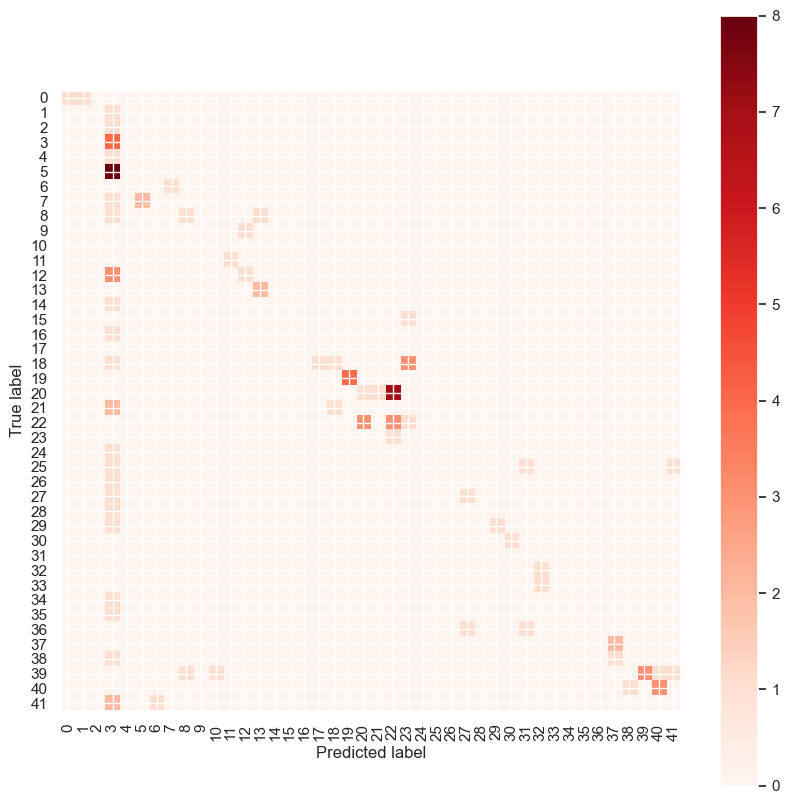

In [8]:
# Step 4.A 
cm = confusion_matrix(testY[0:SAMPLE_SIZE].argmax(axis=1), y_adv_pred_bim.argmax(axis=1))
fig, ax = plt.subplots(figsize=(10,10))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(ax=ax,cmap = 'Reds',include_values=False,xticks_rotation='vertical')

plt.show()

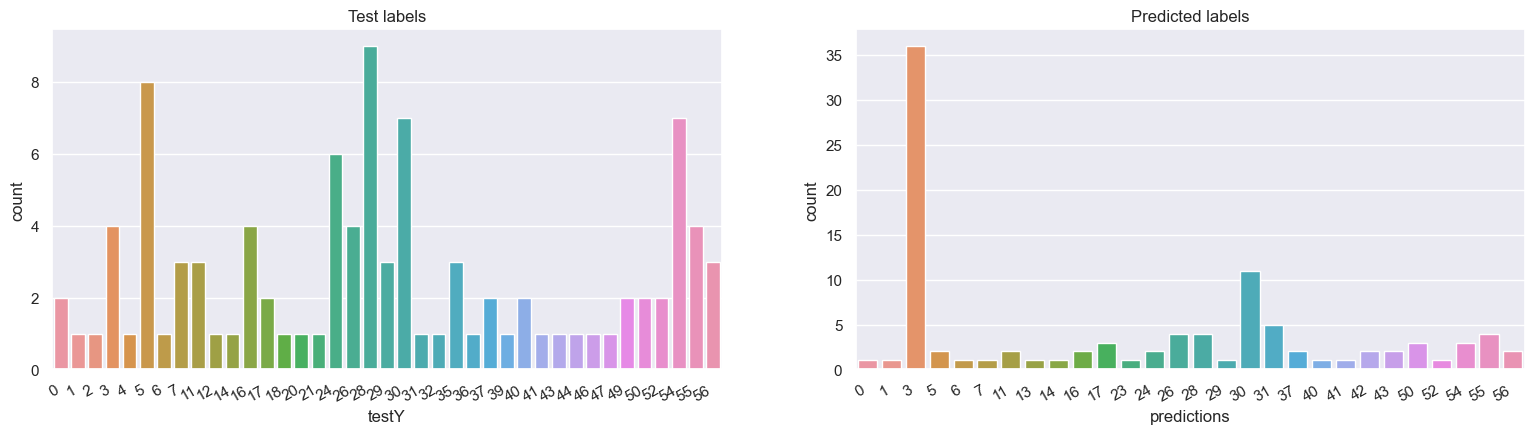

In [9]:
# Step 4.B 
df = pd.DataFrame({'testY':testY[0:SAMPLE_SIZE].argmax(axis=1),'predictions':y_adv_pred_bim.argmax(axis=1)})
fig, ax = plt.subplots(1,2,figsize=(19,5))
sns.countplot(x='testY',data=df,ax=ax[0])
ax[0].set_title('Test labels')

sns.countplot(x='predictions',data=df,ax=ax[1])
ax[1].set_title('Predicted labels')

fig.autofmt_xdate()
plt.show()

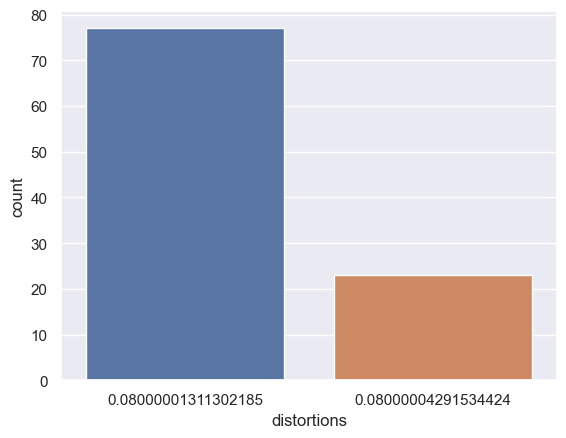

In [10]:
# Step 4.C
distortion_array = testX[0:SAMPLE_SIZE,:] - x_test_adv_bim
distortions = [tf.norm(distortion_array[i,:],ord=np.inf).numpy() for i in range(distortion_array.shape[0])]
df = pd.DataFrame({'distortions':distortions})
sns.countplot(x='distortions',data=df)
plt.show()

In [11]:
## Step 5: Model prediction performance evaluation with C&W based malicious inputs

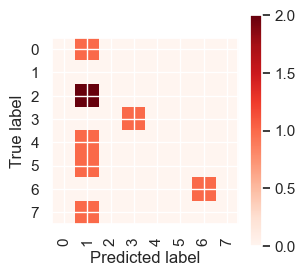

In [12]:
# Step 5.A 
cm = confusion_matrix(testY[0:SAMPLE_SIZE_CW].argmax(axis=1), y_adv_pred_cw.argmax(axis=1))
fig, ax = plt.subplots(figsize=(3,3))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(ax=ax,cmap = 'Reds',include_values=False,xticks_rotation='vertical')

plt.show()

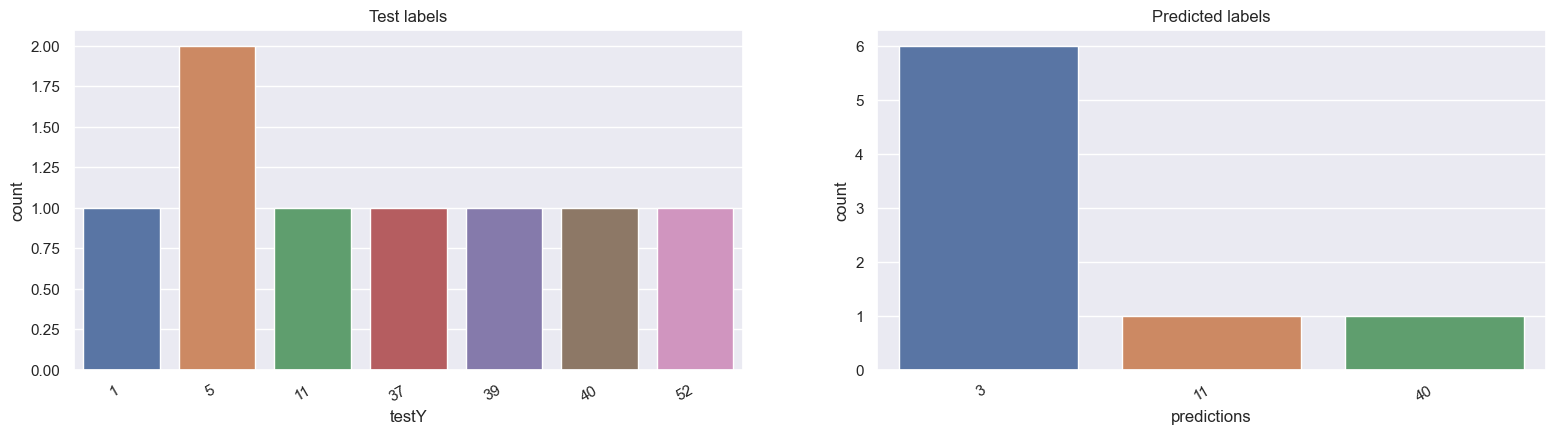

In [13]:
# Step 5.B 
df = pd.DataFrame({'testY':testY[0:SAMPLE_SIZE_CW].argmax(axis=1),'predictions':y_adv_pred_cw.argmax(axis=1)})
fig, ax = plt.subplots(1,2,figsize=(19,5))
sns.countplot(x='testY',data=df,ax=ax[0])
ax[0].set_title('Test labels')

sns.countplot(x='predictions',data=df,ax=ax[1])
ax[1].set_title('Predicted labels')

fig.autofmt_xdate()
plt.show()

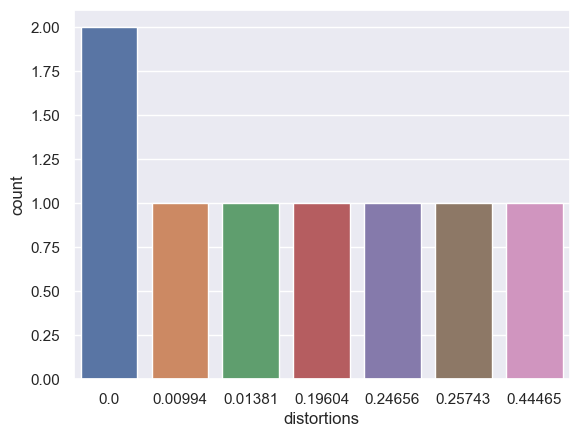

In [14]:
# Step 5.C
distortion_array = testX[0:SAMPLE_SIZE_CW,:] - x_test_adv_cw
distortions = [tf.norm(distortion_array[i,:],ord=np.inf).numpy().round(5) for i in range(distortion_array.shape[0])]
df = pd.DataFrame({'distortions':distortions})
sns.countplot(x='distortions',data=df)
#plt.xticks(rotation=90)
plt.show()